In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier, XGBRegressor
# from xgboost import plot_importance # Features Importance 시각화


import user_functions as uf


import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [61]:
# load
train_datasets = pd.read_csv("../pre_data/[no_up]train_datasets.csv",
                             index_col=0)

# Label 만들기
train_target_ds = train_datasets["TARGET"]
train_target_ds = train_target_ds.astype("int32")

# TARGET feature 삭제
train_datasets.drop(columns="TARGET", inplace=True)

X_train , X_test , y_train , y_test = \
    train_test_split(train_datasets, 
                     train_target_ds, 
                     test_size=0.2, 
                     random_state=2021,
                     stratify=train_target_ds
                    )

In [97]:
s_p_w_value = \
    y_train.value_counts().values.tolist()[0] / y_train.value_counts().values.tolist()[1]

xgb = XGBClassifier(n_estimator=400,
                    # 몇 회의 Step을 반복할지 지정함
                    # 너무 큰 값을 사용하면 Overfitting의 가능성이 상승하고, Model의 Size가 증가함
                    # default X => 필수로 설정해야 함.

                    objective="binary:logistic",
                    # 목적함수로 이 함수의 결과값이 최소화되는 방향으로 학습함
                    # default="reg:squarederror"
                    # reg:squarederror / reg:squaredlogerror / binary:logistic / multi:softmax / multi:softprob / rank:pairwise / rank:ndcg / rank:map

                    learning_rate=0.2,
                    # 반복적으로 부스팅 스텝을 수행할 때 업데이트되는 학습률 값
                    # n(0 ~ 1) / 과적합 조절, 낮을수록 good

                    max_depth=3,
                    # 최대 tree의 깊이로 2^N개의 leaf node가 생김
                    # n(0 ~ inf) / default=6

                    min_child_weight=6, # 과적합 조절, 클수록 분할 자제
                    # Tree에서 가지를 나룰지 결정할 때 필요한 데이터의 weight 합

                    # nthread # default=max
                    # 학습에 사용할 thread 개수
                    
                    colsample_bytree=0.613,
                    # colsample = feature를 Sampling하는 비율
                    # feature가 많거나, 소수의 feature에 의존적일 때 사용하여 과적합 조절
                    # _bytree: 각 Tree(Step) 마다 사용할 Feature의 비율
                    # _bynode: 각 node의 depth 마다 사용할 Feature의 비율
                    # _bylevel: 각 Tree의 depth 마다 사용할 Feature의 비율
                    # n(0 ~ 1) / default=1

                    subsample=0.708,
                    # Tree가 커져서 과적합을 방지하기 위해 데이터를 Sampling하는 비율
                    # n(0 ~ 1) / default=1
                    
                    reg_lambda=4.930,
                    # L2 Regularization parameter
                    # feature의 개수가 많을 경우 적용을 검토함
                    # 너무 큰 가중치를 그 크기에 비례하여 줄임
                    # 커질수록 overfitting의 방지하나, 너무 크면 underfitting 발생
                    # n(0 ~ inf) / default=1

                    reg_aplha=3.564,
                    # L1 Regularization parameter
                    # feature의 개수가 많을 경우 적용을 검토함
                    # 커질수록 overfitting의 방지하나, 너무 크면 underfitting 발생
                    # 불필요한 가중치를 0으로 만듦
                    # n(0 ~ inf) / default=0

                    scale_pos_weight=s_p_w_value,
                    # 특정 값으로 편향된 불균형한 datasets의 가중치를 조절
                    # 권장값 = sum(negative instances) / sum(positive instances)
                    # default=1

                    # verbosity,
                    # Verbosity of printing messages.
                    # Valid values are 0 (silent), 1 (warning), 2 (info), 3 (debug)
                    # default=1
                    )

xgb.fit(X_train, y_train,
        eval_metric="auc", 
        # 각 Step마다 완성된 모델의 평가 지표
        # rmse, emsle, mae, error, error@t, merror, auc, aucpr ...

        early_stopping_rounds=100,
        # eval_metric의 결과가 early_stopping_rounds 횟수 동안 개선되지 않으면, n_estimator(num_boost_round)에 도달하기 전에 종료함.
        # n(0 ~ inf) / default=None(비활성화)

        eval_set=[(X_test, y_test)],

        verbose=True,

        # base_score
        # 초기 편향값(Bias) 시작하는 위치
        # default=0.5
        )

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "n_estimator", "reg_aplha" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.68806
[1]	validation_0-auc:0.70195
[2]	validation_0-auc:0.71197
[3]	validation_0-auc:0.71361
[4]	validation_0-auc:0.71727
[5]	validation_0-auc:0.71799
[6]	validation_0-auc:0.71911
[7]	validation_0-auc:0.72476
[8]	validation_0-auc:0.72950
[9]	validation_0-auc:0.73208
[10]	validation_0-auc:0.73280
[11]	validation_0-auc:0.73542
[12]	validation_0-auc:0.73711
[13]	validation_0-auc:0.73820
[14]	validation_0-auc:0.73937
[15]	validation_0-auc:0.74086
[16]	validation_0-auc:0.74187
[17]	validation_0-auc:0.74241
[18]	validation_0-auc:0.74289
[19]	validation_0-auc:0.74385
[20]	validation_0-auc:0.74596
[21]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.613, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimator=400, n_estimators=100, n_jobs=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_aplha=3.564, reg_lambda=4.93,
              scale_pos_weight=11.419527896995708, subsample=0.708,
              tree_method='exact', validate_parameters=1, verbosity=None)

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [109]:
# .predict_proba: label값이 주어졌을 때 Target 값으로 분류될 확률
# 이진분류이므로 0, 1이고, ndim 2를 배열하므로 [y, x] 순서로 y는 0으로 분류될 확률, x는 1로 분류될 확률을 의미함
# 따라서 위 모델에서는 연체로(1)로 분류될 확률을 의미한다.
xgb.predict_proba(X_test)[:, 1]

array([0.6729002 , 0.23858048, 0.77823794, ..., 0.7648022 , 0.3629113 ,
       0.5809417 ], dtype=float32)

In [107]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, xgb.predict(X_test))

0.6964368596125164

In [ ]:
# # XGBoost 모델의 예측 성능 평가
# # 수정된 get_clf_eval() 함수 
# def get_clf_eval(y_test, pred=None, pred_proba=None):
#     from sklearn.metrics import confusion_matrix, accuracy_score
#     from sklearn.metrics import precision_score, recall_score
#     from sklearn.metrics import f1_score, roc_auc_score
    
#     confusion = confusion_matrix( y_test, pred)
#     accuracy = accuracy_score(y_test , pred)
#     precision = precision_score(y_test , pred)
#     recall = recall_score(y_test , pred)
#     f1 = f1_score(y_test,pred)
#     # ROC-AUC 추가 
#     roc_auc = roc_auc_score(y_test, pred_proba)
#     print('오차 행렬')
#     print(confusion)
#     # ROC-AUC print 추가
#     print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
#     F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

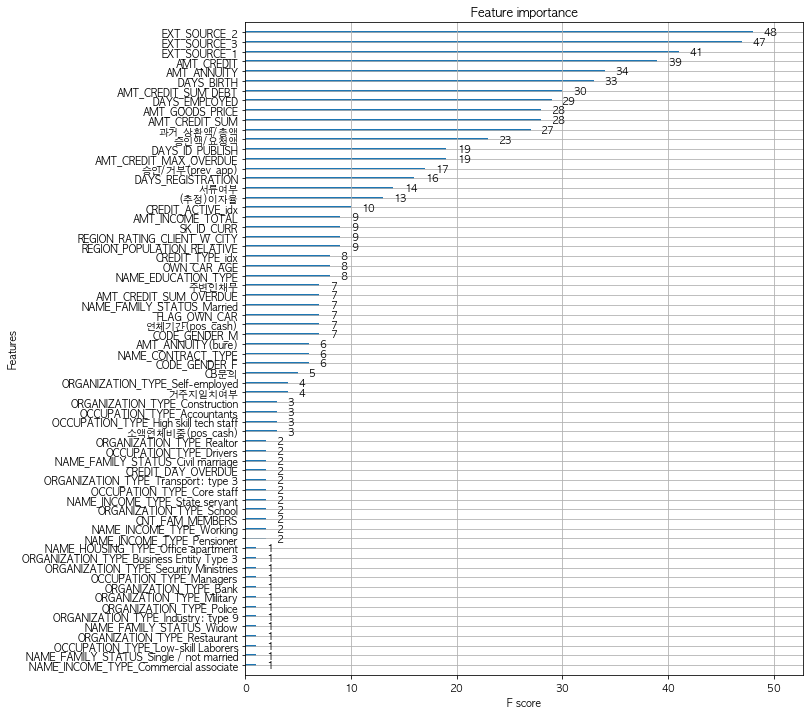

In [92]:
fig, ax = plt.subplots(figsize=(10, 12))
xgboost.plot_importance(xgb, ax=ax)

In [ ]:
# y_train.value_counts()
# TARGET
# 0.0       223503
# 1.0        19572
# dtype: int64

# y_train.value_counts()
# TARGET
# 0.0       223503
# 1.0        19572
# dtype: int64

In [ ]:
# nthread=4,
# n_estimators=2000,
# learning_rate=0.02,
# max_depth = 11,
# num_leaves=58,
# colsample_bytree=0.613,
# subsample=0.708,
# max_bin=407, # Only used if tree_method is set to hist or gpu_hist.
# reg_alpha=3.564,
# reg_lambda=4.930,
# min_child_weight= 6,
# min_child_samples=165,
# silent=-1,
# verbose=-1,ㅃ


# clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 100,  early_stopping_rounds= 200)

In [59]:
# # 다중공선성 제거
# # https://john-analyst.medium.com/캐글-home-credit-default-risk-9225050b6fa6

# corrs = train_datasets.iloc[:, 1:].corr()

# above_feature = {}

# for corr in corrs:
#     above_feature[corr] = list(corrs.index[corrs[corr] > 0.8])

# for key in above_feature.keys():
#     if len(above_feature[key]) > 1:
#         print(above_feature[key])

# uf.corr_heatmap(train_datasets[['DAYS_EMPLOYED', 'Contact', 'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA']])